# Introduction to CFG in Scalpel

## What is the control flow graph
The control-flow graph(CFG) construction module generates intra-procedural CFGs, which are an essential component in static flow analysis with applications such as program optimization and taint analysis. A CFG represents all paths that might be traversed through a program during its execution. The CFGs of a Python project can be combined with the call graph to generate an inter-procedural CFG of the project.


## Let's install Scalpel first

Use the command in your virtual environment to install Scalpel.
```console
pip install python-scalpel
```

### Import CFGBuilder

In [1]:
import sys

from scalpel.cfg import CFGBuilder

### Let's have some example codes.

### Example 1: While statement

In [2]:
# let's have an example code 
src= """
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

fib_gen = fib()
for _ in range(10):
    next(fib_gen)
"""

### The recursive data structure to store all CFG for given source code
Building CFGs for the given source code. Please note that the function returns a dictionary structure in which CFGs for every function definition will be assigned a CFG. 

 **CFGBuilder()** is a class where a control flow graph builder is an ast.NodeVisitor that can walk through a program's AST and iteratively build the corresponding CFG. The function **build_from_src()** is used to build a cfg from given src.
 


In [3]:
# Please note there cfg returned from CFGBuilder().build_from-src is a recursive data structure
cfg = CFGBuilder().build_from_src("Fib", src)
fun_cfg = cfg.functioncfgs.items()

### A picture is worth a thousand words

Scalpel uses **graphviz** to build visuals for Control Flow Graphs, which should be installed on the base environment of OS and the installation only within the environment might not work properly.

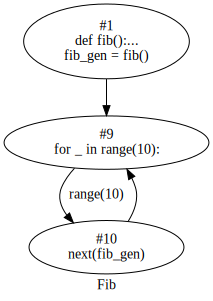

In [4]:
cfg.build_visual('png')

  In Scalpel, there are other functions that can generate CFG from different sources like file. **cfg.functioncfgs** is the function to create a new sub-cfg and added to the function CFGs of the current CFG. Please note that **cfg.functioncfgs** returns a dictionary structure which contains the enclosing block id and node name.

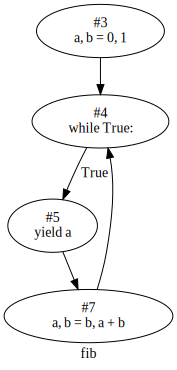

In [5]:
# let's visualize a function cfg 
fib_cfg = None 
for (block_id, fun_name), fun_cfg in cfg.functioncfgs.items():
    if fun_name == "fib":
        fib_cfg = fun_cfg
fib_cfg.build_visual('png')

### Example 2: if-else Statement

In [6]:
src = '''
def compareNum(a,b,c):
    if a == 10:
        if b > c:
            a = b
        else:
            a = c
    print(a,b,c)
    
compareNum(11,3,2)
'''

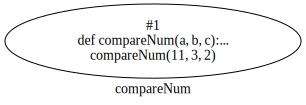

In [7]:
cfgTwo = CFGBuilder().build_from_src("compareNum", src)
fun_cfg = cfgTwo.functioncfgs.items()
cfgTwo.build_visual('png')

The CFG of compareNum function is a nested **if-else** statement. Compared with the first control flow graph of the given source code, there are more blocks in the second graph. Since Scalpel generates cfg for every function in the source code. 

In **visit_if** function in Scalpel, block 3 is first created for since it's the body of the if, followed by the block 4 which is the second if statement. Then after the if-else there will create a block which is the block 5. After that, visiting the children of the body of the if-else to populate the block. The edges from block 4 to block 6 and 8 is checking the condition of b and c. Thus the block 6 and 8 are formed.

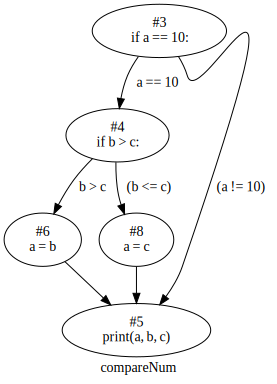

In [8]:
compareNum_cfg = None 
for (block_id, fun_name), fun_cfg in cfgTwo.functioncfgs.items():
    if fun_name == "compareNum":
        compareNum_cfg = fun_cfg
compareNum_cfg.build_visual('png')

### Example 3: for loop statement

In [9]:
src = '''
def countPrimes(num):
    count = 0
    for i in range(num+1):
        if i > 1:
            for j in range(2,i):
                if i % j == 0:
                    break
            else:
                print(i)
                count += 1
    print (count)
    
countPrimes(10)
'''

The above example is to count the prime numbers in a given range, which is more complex than before with more nested statement about **for-loop statement** and **if-else statement**. Similar to the while statement, two new blocks will be generated when meet the for loop. One for the body of the for loop which is the block 5, another is after the for loop which is block 6 in the graph. When walking to the children of the if statement in block 5, more blocks are formed. The block 7 is for a new for statement when the i is larger than 1. However, the edges walks to the block 4 when i is less than 1 which is the if is not true. Similarly, the block 7 and block 9 are same to before. There is a little difference  that is the code in line 9, it encounters a break. Thus it looks up the parent chain which walks to the block 4 as still.

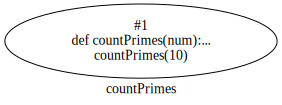

In [10]:
cfgThree = CFGBuilder().build_from_src("countPrimes", src)
fun_cfg = cfgThree.functioncfgs.items()
cfgThree.build_visual('png')

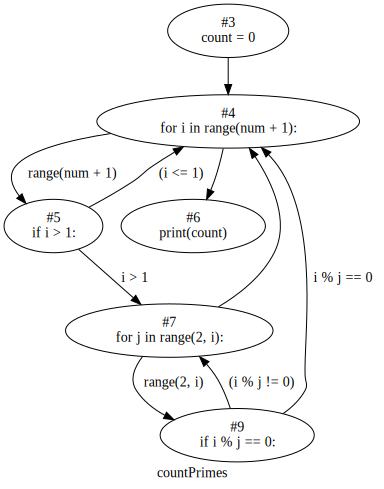

In [11]:
countPrimes_cfg = None 
for (block_id, fun_name), fun_cfg in cfgThree.functioncfgs.items():
    if fun_name == "countPrimes":
        countPrimes_cfg = fun_cfg
countPrimes_cfg.build_visual('png')

### Example 4: Try-except statement

In [12]:
src = '''
def divide(x,y):
    try:
        result = x // y
        print(result)
    except ZeroDivisionError:
        print("Erro! Cannot divide zero")
        
divide(10,2)
'''

This example  is about the **try-except statement**, which is more straightforward than other examples. It will create new blocks when the try statement is happen which is block 3 and check what's inside the try statement. Then it visits the handlers and create blocks for the handler which is block 5 here. Finally, visiting the children in the body. Moreover, the Scalpel has predicted more complicated situation like there might be else or break statement. Thus more blocks and exits will also be added.

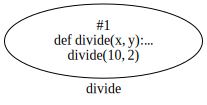

In [13]:
cfgFour = CFGBuilder().build_from_src("divide", src)
fun_cfg = cfgFour.functioncfgs.items()
cfgFour.build_visual('png')

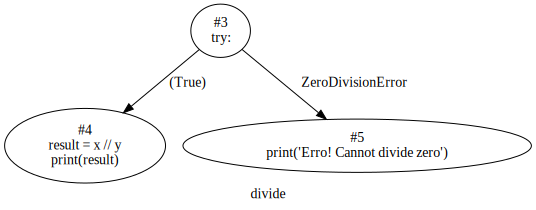

In [14]:
divide_cfg = None 
for (block_id, fun_name), fun_cfg in cfgFour.functioncfgs.items():
    if fun_name == "divide":
        divide_cfg = fun_cfg
divide_cfg.build_visual('png')

### More challenging Try-catch

This example is about **try-catch** statements in PYthon, which is a bit challenging compared to previous examples.
The cfg builder generates path for both the cases. For the **try** path, it generates label as **True** and for the path where exception occurs, it labels the path with the error name, as **IOError** in this example.

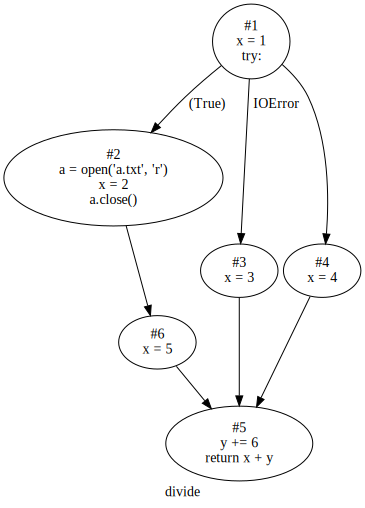

In [15]:
import sys
sys.path.append('../src/')
from scalpel.cfg import CFGBuilder

src  = """
x = 1
try:
    a = open("a.txt", "r")
    x = 2
    a.close()
except IOError:
    x = 3
except:
    x = 4
else:
    x = 5
finally:
    y = 1

y += 6
return x + y
"""
cfg_five = CFGBuilder().build_from_src("divide", src)
cfg_five.build_visual('png')


### Blocks in a CFG: A deep look into CFG 
Let's start by applying BFS to get all blocks.

In [16]:
all_blocks = cfg.get_all_blocks()
entry_block = cfg.entryblock

### We can also retreive information from any blocks such as :

1. block id
2. source code of the block
3. a list of statements 

In [17]:
import ast 

entry_block = all_blocks[0]
print(f"block id :{entry_block.id}\n")
print(f"block source\n {entry_block.get_source()}")
print(f"block id :{entry_block.id}")

### 
statements = entry_block.statements
for stmt in statements:
    print(ast.dump(stmt))  # dump this statement as string from the AST node

block id :1

block source
 #1
def fib():...
fib_gen = fib()

block id :1
FunctionDef(name='fib', args=arguments(posonlyargs=[], args=[], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Assign(targets=[Tuple(elts=[Name(id='a', ctx=Store()), Name(id='b', ctx=Store())], ctx=Store())], value=Tuple(elts=[Constant(value=0), Constant(value=1)], ctx=Load())), While(test=Constant(value=True), body=[Expr(value=Yield(value=Name(id='a', ctx=Load()))), Assign(targets=[Tuple(elts=[Name(id='a', ctx=Store()), Name(id='b', ctx=Store())], ctx=Store())], value=Tuple(elts=[Name(id='b', ctx=Load()), BinOp(left=Name(id='a', ctx=Load()), op=Add(), right=Name(id='b', ctx=Load()))], ctx=Load()))], orelse=[])], decorator_list=[])
Assign(targets=[Name(id='fib_gen', ctx=Store())], value=Call(func=Name(id='fib', ctx=Load()), args=[], keywords=[]))
